In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.multitest as multi
import re
import dataframe_image as dfi
from statannotations.Annotator import Annotator

sys.path.append('/home/felix/jupyter/jupyter_notebooks/functions')

In [27]:
import alphafold2_multimer_screen as af2h

In [28]:
df = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/data/final_poc_multimers_scoring.tsv', sep='\t', index_col=0)
gips = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/data/gips_final_poc_multimers_scoring.tsv', sep='\t', index_col=0)
status = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/data/pos_control_complexes.tsv', sep='\t', names=['complex_id', 'type'])
pos = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/data/pos_controls_overview.tsv', sep='\t', index_col=0)
msa = pd.read_csv('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/data/scores_overview_combined.tsv', sep='\t', index_col=0)

In [29]:
status_general = status[status.type == 'general']

In [30]:
general = df[df.prot_id.isin(status_general.complex_id).to_numpy()]

In [31]:
df['A'] = [x.replace('mature', '') for x in df['A']]
df['B'] = [x.replace('mature', '') for x in df['B']]

general['A'] = [x.replace('mature', '') for x in general['A']]
general['B'] = [x.replace('mature', '') for x in general['B']]

gips['A'] = [x.replace('mature', '') for x in gips['A']]
gips['B'] = [x.replace('mature', '') for x in gips['B']]

<ipython-input-31-0b8f0cc45d6a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general['A'] = [x.replace('mature', '') for x in general['A']]
<ipython-input-31-0b8f0cc45d6a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  general['B'] = [x.replace('mature', '') for x in general['B']]


In [32]:
general = af2h.rename_df(general, 'A', 'Gmb13glucanase', 'GmEGaseA')
general = af2h.rename_df(general, 'A', 'Papain', 'CpPapain')
general = af2h.rename_df(general, 'A', 'C14', 'SlC14')
general = af2h.rename_df(general, 'A', 'CitrusRD21a', 'CsRD21a')
general = af2h.rename_df(general, 'A', 'Pip1', 'SlPip1')
general = af2h.rename_df(general, 'A', 'P69B', 'SlP69B')
general = af2h.rename_df(general, 'A', 'Subtilisin', 'BsSubtilisin')
general = af2h.rename_df(general, 'A', 'AtB13Glucanase', 'AtEGase')

general = af2h.rename_df(general, 'B', 'Epi10', 'PiEpi10')
general = af2h.rename_df(general, 'B', 'Epi1', 'PiEpi1')
general = af2h.rename_df(general, 'B', 'PiPi', 'Pi')

gips = af2h.rename_df(gips, 'A', 'Gmb13glucanase2', 'GmEGaseA2')
gips = af2h.rename_df(gips, 'A', 'Gmb13glucanase', 'GmEGaseA1')
gips = af2h.rename_df(gips, 'A', 'EGaseA1B', 'GmEGaseB')
gips = af2h.rename_df(gips, 'A', 'SlB13glucanase', 'SlEGase')

In [33]:
df_pivot = df.pivot_table(values='iptm_ptm', index=["A"], columns="B", aggfunc='mean')
general_pivot = general.pivot_table(values='iptm_ptm', index=['A'], columns='B', aggfunc='mean')
gips_pivot = gips.pivot_table(values='iptm_ptm', index='A', columns='B', aggfunc='mean')

#### Change order of pivot table for heatmap to be in the right layout

In [34]:
target_order = ['SpimRcr3', 'SlPip1', 'SlC14', 'ZmCP1A', 'ZmCP1B', 'ZmCP2', 'ZmXCP2', 'CsRD21a', 'SlP69B', 'NbGip2', 'GmGip1', 'GmEGaseA', 'AtEGase', 'ZmPOX12']
pathogen_order = ['PtoCip1', 'PiEpiC1', 'PiEpiC2B', 'CfAvr2', 'UmPit2', 'ClSDE1', 'GrVAP1', 'PiEpi1', 'PiEpi1a', 'PiEpi10', 'PiEpi10b', 'PpXEG1', 'PpXLP1', 'PsXEG1', 'PsXLP1', 'PsGip1', 'Hg30C02', 'UmPep1']

general_pivot = general_pivot.reindex(target_order)
general_pivot = general_pivot.reindex(pathogen_order, axis=1)

In [35]:
pos_controls = ['matureZmCP1A_matureUmPit2', 'matureZmCP1B_matureUmPit2', 'matureZmXCP2_matureUmPit2', 'matureZmCP2_matureUmPit2', 'matureCitrusRD21a_matureClSDE1', 'matureC14_maturePtoCip1', 'maturePip1_maturePtoCip1', 'matureSpimRcr3_maturePtoCip1', 'matureC14_maturePiEpiC1', 'maturePip1_maturePiEpiC1', 'matureSpimRcr3_maturePiEpiC1', 'matureC14_matureCfAvr2', 'maturePip1_matureCfAvr2', 'matureSpimRcr3_matureCfAvr2', 'matureSpimRcr3_matureGrVAP1', 'matureC14_maturePiEpiC2B', 'maturePip1_maturePiEpiC2B', 'matureSpimRcr3_maturePiEpiC2B', 'matureGmb13glucanase_maturePsGip1', 'matureAtB13Glucanase_matureHg30C02', 'matureGmGip1_maturePsXEG1', 'matureGmGip1_maturePsXLP1', 'matureNbGip2_maturePpXEG1', 'matureNbGip2_maturePpXLP1', 'matureP69B_matureEpi10', 'matureP69B_matureEpi1', 'matureP69B_matureEpi1a', 'matureZmPOX12_matureUmPep1']

In [36]:
true_pos = ['matureC14_maturePtoCip1', 'maturePip1_maturePtoCip1', 'matureSpimRcr3_maturePtoCip1', 'matureC14_maturePiEpiC1', 'maturePip1_maturePiEpiC1', 'matureSpimRcr3_maturePiEpiC1', 'matureC14_maturePiEpiC2B', 'maturePip1_maturePiEpiC2B', 'matureSpimRcr3_maturePiEpiC2B', 'matureNbGip2_maturePpXEG1', 'matureNbGip2_maturePpXLP1', 'matureSubtilisin_matureEpi10', 'matureSubtilisin_matureEpi1', 'matureP69B_matureEpi10', 'matureP69B_matureEpi1', 'matureP69B_matureEpi1a']

In [37]:
false_neg = ['matureZmPOX12_matureUmPep1', 'matureZmCP1A_matureUmPit2', 'matureZmCP1B_matureUmPit2', 'matureZmXCP2_matureUmPit2', 'matureZmCP2_matureUmPit2', 'matureCitrusRD21a_matureClSDE1', 'matureC14_matureCfAvr2', 'maturePip1_matureCfAvr2', 'matureSpimRcr3_matureCfAvr2', 'matureSpimRcr3_matureGrVAP1', 'matureGmb13glucanase_maturePsGip1', 'matureAtB13Glucanase_matureHg30C02', 'matureGmGip1_maturePsXEG1', 'matureGmGip1_maturePsXLP1']

In [38]:
poc_pivot = general_pivot.copy()

## Overview of MSA depth

In [39]:
msa = pd.concat([msa, pos.reindex(msa.index)], axis=1)
msa = msa.fillna('unknown')

msa['A'] = [x.replace('mature', '') for x in msa['A']]
msa['B'] = [x.replace('mature', '') for x in msa['B']]

msa = msa[msa.A != 'SlB13glucanase1']
msa = msa[msa.A != 'SlB13glucanase2']
msa = msa[msa.A != 'Subtilisin']
msa = msa[msa.A != 'Papain']
#msa = msa[msa.A != 'AtB13Glucanase']

for i in msa.index:
    msa.loc[i, 'mean_iptm'] = df_pivot.loc[msa.loc[i, 'A'], msa.loc[i, 'B']]
    
msa = msa.sort_values(by='mean_non_gap_coverage_B')

msa = af2h.rename_df(msa, 'A', 'Gmb13glucanase', 'GmEGaseA')
msa = af2h.rename_df(msa, 'A', 'Papain', 'CpPapain')
msa = af2h.rename_df(msa, 'A', 'C14', 'SlC14')
msa = af2h.rename_df(msa, 'A', 'CitrusRD21a', 'CsRD21a')
msa = af2h.rename_df(msa, 'A', 'Pip1', 'SlPip1')
msa = af2h.rename_df(msa, 'A', 'P69B', 'SlP69B')
msa = af2h.rename_df(msa, 'A', 'Subtilisin', 'BsSubtilisin')
msa = af2h.rename_df(msa, 'A', 'AtB13Glucanase', 'AtEGase')

msa = af2h.rename_df(msa, 'B', 'Epi10', 'PiEpi10')
msa = af2h.rename_df(msa, 'B', 'Epi1', 'PiEpi1')
msa = af2h.rename_df(msa, 'B', 'PiPi', 'Pi')

In [40]:
for i in msa.index:
    msa.loc[i, 'prot_id'] = i.replace('mature', '')
    
msa = af2h.rename_df(msa, 'prot_id', 'Gmb13glucanase', 'GmEGaseA')
msa = af2h.rename_df(msa, 'prot_id', 'Papain', 'CpPapain')
msa = af2h.rename_df(msa, 'prot_id', 'C14', 'SlC14')
msa = af2h.rename_df(msa, 'prot_id', 'CitrusRD21a', 'CsRD21a')
msa = af2h.rename_df(msa, 'prot_id', 'Pip1', 'SlPip1')
msa = af2h.rename_df(msa, 'prot_id', 'P69B', 'SlP69B')
msa = af2h.rename_df(msa, 'prot_id', 'AtB13Glucanase', 'AtEGase')

msa = af2h.rename_df(msa, 'prot_id', 'Epi10', 'PiEpi10')
msa = af2h.rename_df(msa, 'prot_id', 'Epi1', 'PiEpi1')
msa = af2h.rename_df(msa, 'prot_id', 'PiPi', 'Pi')

In [41]:
contr = msa[msa.status != 'unknown']

In [42]:
msa_cov_same = []

for prot in target_order:
    msa_cov_same.append([prot, np.mean(contr[contr.A == prot]['mean_non_gap_coverage_A'].values), 'target'])

for prot in pathogen_order:
    msa_cov_same.append([prot, np.mean(contr[contr.B == prot]['mean_non_gap_coverage_B'].values), 'effector'])    
    
msa_cov_same = pd.DataFrame(msa_cov_same, columns=['Protein', 'Mean Non-Gap Coverage per AA', 'type'])


msa_cov = []

for prot in np.unique(contr.A.values):
    msa_cov.append([prot, np.mean(contr[contr.A == prot]['mean_non_gap_coverage_A'].values), 'target'])

for prot in np.unique(contr.B.values):
    msa_cov.append([prot, np.mean(contr[contr.B == prot]['mean_non_gap_coverage_B'].values), 'effector'])    
    
msa_cov = pd.DataFrame(msa_cov, columns=['Protein', 'Mean Non-Gap Coverage per AA', 'type']).sort_values(by=['type', 'Mean Non-Gap Coverage per AA'])

## Boxplots of POC

In [43]:
pos_df = general[general.prot_id.isin(pos_controls)]
pos_df.index = range(len(pos_df))

for i in pos_df.index:
    if pos_df.loc[i, 'prot_id'] in true_pos:
        pos_df.loc[i, 'type'] = 'true_pos'
        
    elif pos_df.loc[i, 'prot_id'] in false_neg:
        pos_df.loc[i, 'type'] = 'false_neg'
        
    else:
        print('ERROR: {}'.format(pos_df.loc[i, 'prot_id']))

pos_df = pos_df.sort_values(by='iptm_ptm', ascending=True)        
pos_df_pivot = pos_df.pivot_table(values='iptm_ptm', index='A', columns='B', aggfunc='mean')

/home/felix/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/felix/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [19]:
for i in pos_df.index:
    pos_df.loc[i, 'prot_id'] = pos_df.loc[i, 'prot_id'].replace('mature', '')
    
pos_df = af2h.rename_df(pos_df, 'prot_id', 'Gmb13glucanase', 'GmEGaseA')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'Papain', 'CpPapain')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'C14', 'SlC14')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'CitrusRD21a', 'CsRD21a')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'Pip1', 'SlPip1')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'P69B', 'SlP69B')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'Subtilisin', 'BsSubtilisin')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'AtB13Glucanase', 'AtEGase')

pos_df = af2h.rename_df(pos_df, 'prot_id', 'Epi10', 'PiEpi10')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'Epi1', 'PiEpi1')
pos_df = af2h.rename_df(pos_df, 'prot_id', 'PiPi', 'Pi')

In [20]:
pos_df['mean_non_gap_coverage_B'] = 0

for i in np.unique(pos_df.prot_id):
    indeces = pos_df[pos_df.prot_id == i].index
    values = msa[msa.prot_id == i]['mean_non_gap_coverage_B'].values[0]    
    pos_df.loc[indeces, 'mean_non_gap_coverage_B'] = values

# Make POC Figure 1

In [21]:
small_poc_boxplot = general[(general.A.isin(['SlPip1', 'SlP69B'])) & (general.B.isin(['PiEpiC2B', 'PiEpi1a']))]

for i in small_poc_boxplot.index:
    small_poc_boxplot.loc[i, 'prot_id'] = small_poc_boxplot.loc[i, 'prot_id'].replace('mature', '')
    
small_poc_boxplot = af2h.rename_df(small_poc_boxplot, 'prot_id', 'Pip1', 'SlPip1')
small_poc_boxplot = af2h.rename_df(small_poc_boxplot, 'prot_id', 'P69B', 'SlP69B')
small_poc_boxplot = af2h.rename_df(small_poc_boxplot, 'prot_id', 'Epi1', 'PiEpi1')

/home/felix/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


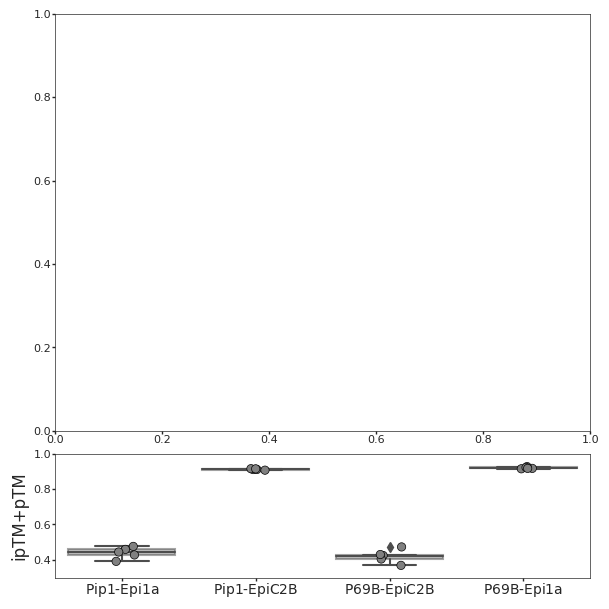

In [22]:
def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
            ax.xaxis.set_tick_params(which='minor', width=0.5, length=2)
            ax.xaxis.set_tick_params(which='major', width=1, length=2)
            ax.yaxis.set_tick_params(which='minor', width=0.5, length=2)
            ax.yaxis.set_tick_params(which='major', width=1, length=2)

sns.set(font_scale=0.3, style='ticks')

fig = plt.figure(figsize=(6, 6))

cand = plt.subplot2grid((4, 2), (0, 0), rowspan=3, colspan=2)
box = plt.subplot2grid((4, 2), (3, 0), colspan=2)

axes = [cand, box]

annotate_axes(axes)

### Define some arrays

prot_order = ['SlPip1_PiEpi1a', 'SlPip1_PiEpiC2B', 'SlP69B_PiEpiC2B', 'SlP69B_PiEpi1a'] 
prot_label = ['$\it$Pip1-$\it$Epi1a', '$\it$Pip1-$\it$EpiC2B', '$\it$P69B-$\it$EpiC2B', '$\it$P69B-$\it$Epi1a'] 


# Plot coverage of host-derived proteins

sns.boxplot(data=small_poc_boxplot, x='prot_id', y='iptm_ptm', boxprops={'alpha':0.5}, color='grey', order=prot_order, ax=box)
sns.stripplot(data=small_poc_boxplot, x='prot_id', y='iptm_ptm', s=6, color='grey', edgecolor='black', linewidth=0.5, order=prot_order, ax=box)

box.set_ylim(0.3, 1.0)
box.set_xlabel('', fontsize=10)
box.set_ylabel('ipTM+pTM', fontsize=12)
box.set_xticklabels(prot_label, size=10)


plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/corrections/Figure1a_jupyter.svg', transparent=True)
plt.show()

In [23]:
tmp = ['matureC14_maturePiEpiC2B', 'matureC14_maturePiEpiC1', 'matureSpimRcr3_maturePiEpiC2B', 'matureSpimRcr3_maturePiEpiC1']

epics_comp =  general[general.prot_id.isin(tmp)]

for i in epics_comp.index:
    epics_comp.loc[i, 'prot_id'] = epics_comp.loc[i, 'prot_id'].replace('mature', '')

epics_comp = af2h.rename_df(epics_comp, 'prot_id', 'C14', 'SlC14')
epics_comp = af2h.rename_df(epics_comp, 'prot_id', 'Epi1', 'PiEpi1')

/home/felix/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [24]:
c14_epic2b = epics_comp[epics_comp.prot_id == 'SlC14_PiEpiC2B'].iptm_ptm
c14_epic1 = epics_comp[epics_comp.prot_id == 'SlC14_PiEpiC1'].iptm_ptm
rcr3_epic2b = epics_comp[epics_comp.prot_id == 'SpimRcr3_PiEpiC2B'].iptm_ptm
rcr3_epic1 = epics_comp[epics_comp.prot_id == 'SpimRcr3_PiEpiC1'].iptm_ptm

c14_epic2b__rcr3_epic2b_t, c14_epic2b__rcr3_epic2b_p = af2h.ttest_ind(c14_epic2b, rcr3_epic2b)
c14_epic2b__c14_epic1_t, c14_epic2b__c14_epic1_p = af2h.ttest_ind(c14_epic2b, c14_epic1)
rcr3_epic2b__rcr3_epic1_t, rcr3_epic2b__rcr3_epic1_p = af2h.ttest_ind(rcr3_epic2b, rcr3_epic1)

stats = [['C14_EpiC2B__Rcr3_EpiC2B', c14_epic2b__rcr3_epic2b_p], ['C14_EpiC2B__C14_EpiC1', c14_epic2b__c14_epic1_p], ['Rcr3_EpiC2B__Rcr3_EpiC1', rcr3_epic2b__rcr3_epic1_p]]
stats = pd.DataFrame(stats, columns=['comparison', 'p_value'])
stats
multi.multipletests(stats['p_value'].values, alpha=0.05, method='fdr_bh')

(array([ True, False, False]),
 array([0.00165782, 0.0988575 , 0.07110917]),
 0.016952427508441503,
 0.016666666666666666)

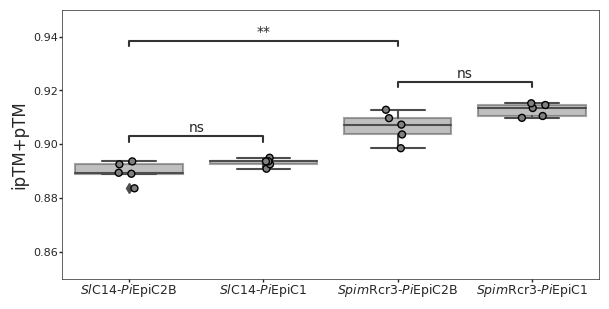

In [25]:
def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
            ax.xaxis.set_tick_params(which='minor', width=0.5, length=2)
            ax.xaxis.set_tick_params(which='major', width=1, length=2)
            ax.yaxis.set_tick_params(which='minor', width=0.5, length=2)
            ax.yaxis.set_tick_params(which='major', width=1, length=2)

sns.set(font_scale=0.3, style='ticks')

fig = plt.figure(figsize=(6, 3))

boxp = plt.subplot2grid((1, 1), (0, 0))

axes = [boxp]
annotate_axes(axes)

### Define some arrays

comp_order = ['SlC14_PiEpiC2B', 'SlC14_PiEpiC1', 'SpimRcr3_PiEpiC2B', 'SpimRcr3_PiEpiC1']
comp_names = ['$\itSl$C14-$\itPi$EpiC2B', '$\itSl$C14-$\itPi$EpiC1', '$\itSpim$Rcr3-$\itPi$EpiC2B', '$\itSpim$Rcr3-$\itPi$EpiC1']

# Heatmap of POC

sns.boxplot(data=epics_comp, x='prot_id', y='iptm_ptm', color='grey', boxprops={'alpha':0.5}, order=comp_order, ax=boxp)
sns.stripplot(data=epics_comp, x='prot_id', y='iptm_ptm', color='grey', s=5, edgecolor='black', linewidth=1, order=comp_order, ax=boxp)
boxp.set_ylim(0.85, 0.95)
boxp.set_xlabel('', fontsize=12)
boxp.set_ylabel('ipTM+pTM', fontsize=12)
boxp.set_xticklabels(comp_names, fontsize=9)


comps_1 = [('SlC14_PiEpiC2B', 'SlC14_PiEpiC1'), ('SlC14_PiEpiC2B', 'SpimRcr3_PiEpiC2B'), ('SpimRcr3_PiEpiC2B', 'SpimRcr3_PiEpiC1')]
pvals_1 = ['ns', '**', 'ns']

annotator = Annotator(boxp, comps_1, data=epics_comp, x='prot_id', y='iptm_ptm', order=comp_order)
annotator.configure(verbose=0, fontsize=10) 
annotator.set_custom_annotations(pvals_1)
annotator.annotate()


plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/corrections/Figure1d_jupyter.png', dpi=200, transparent=True)
plt.show()

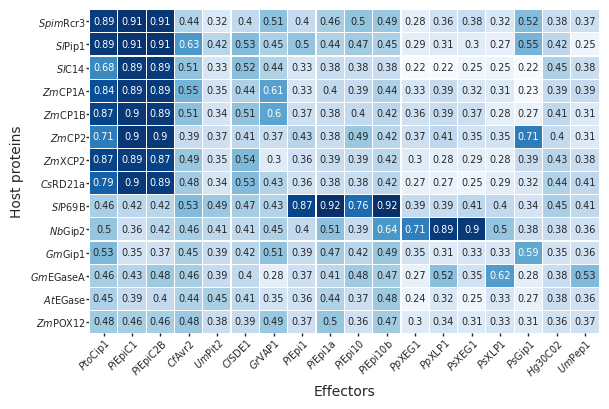

In [26]:
def annotate_axes(axes_list):
    for i, ax in enumerate(axes_list):
        ax.tick_params(axis='both', labelsize=8, pad=0.5)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(0.5)
            ax.xaxis.set_tick_params(which='minor', width=0.5, length=2)
            ax.xaxis.set_tick_params(which='major', width=1, length=2)
            ax.yaxis.set_tick_params(which='minor', width=0.5, length=2)
            ax.yaxis.set_tick_params(which='major', width=1, length=2)

sns.set(font_scale=0.3, style='ticks')

fig = plt.figure(figsize=(6, 4))

heat = plt.subplot2grid((1, 1), (0, 0))

axes = [heat]
annotate_axes(axes)

### Define some arrays
row_italics = []
for row in poc_pivot.index:
    info = re.search("([A-Z][a-z]+)([A-Z0-9].+)", row)
    row_italics.append("$\it{}${}".format(info.group(1), info.group(2)))
    
col_italics = []
for col in poc_pivot.columns:
    info = re.search("([A-Z][a-z]+)([A-Z0-9].+)", col)
    col_italics.append("$\it{}${}".format(info.group(1), info.group(2)))

# Plot coverage of host-derived proteins

# Heatmap of POC
sns.heatmap(poc_pivot, annot=True, annot_kws={"size": 7}, linewidths=0.1, cmap='Blues', cbar=False, cbar_kws={"orientation":"horizontal", "shrink":0.5}, xticklabels=True, yticklabels=True, vmin=np.min(poc_pivot.min()), vmax=np.max(poc_pivot.max()), ax=heat)
heat.set_xlabel('Effectors', fontsize=10)
heat.set_ylabel('Host proteins', fontsize=10)
heat.set_xticklabels(col_italics, rotation=45, ha='right', rotation_mode="anchor", size=7)
heat.set_yticklabels(row_italics, rotation=0, ha='right', rotation_mode="anchor", size=7)


plt.tight_layout()
#plt.savefig('/home/felix/thesis/chapter5_AF2H/figure1_Proof_of_concept/corrections/Figure1c_jupyter_full.svg', transparent=True)
plt.show()